In [8]:
import numpy.testing as nt

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.io import loadmat
output = loadmat('output.mat')

97.552967789


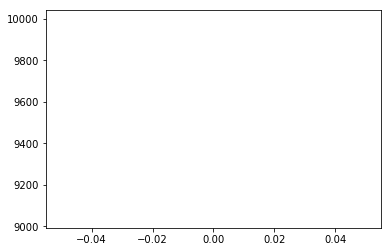

In [10]:
# testing no sparsity, no smoothnes, 1 iteration
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=1, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])

print(LA.norm(output['V'] - (model.W@model.H)))

plt.plot(model.cost)

In [11]:
# testing the initial distance
nt.assert_almost_equal(LA.norm(output['V'] - (output['init_W']@output['init_H'])),213.432630275)

In [12]:
# compare cost after 1 iteration
nt.assert_almost_equal(model.cost, 9516.581524438)

In [13]:
# testing no sparsity, no smoothness, 200 iterations
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=200, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])
nt.assert_almost_equal(model.cost[-1],3636.162716116)

In [14]:
# testing sparsity, 1 iteration
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=1, sparsity=1, smoothness=0, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])
nt.assert_almost_equal(model.cost[-1],4750.738752595)

In [15]:
# testing smoothness, 1 iteration
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=1, sparsity=0, smoothness=1, betaW=0.0, betaH=0.0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])

import numpy.linalg as LA
print(LA.norm(model.W))
print(LA.norm(model.H))

nt.assert_almost_equal(LA.norm(model.W),4.7809,decimal=4)
nt.assert_almost_equal(LA.norm(model.H),39.6015,decimal=4)
nt.assert_almost_equal(model.cost[-1],6667.921143908)

4.78094441581
39.6015552377


In [16]:
# testing sparsity and smoothness, 1 iteration
model = smoothNMF(r=5, max_iter=1, sparsity=1, smoothness=1, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])
nt.assert_almost_equal(model.cost[-1],6715.167611171)


In [20]:
# testing sparsity and smoothness, 200 iterations
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=200, sparsity=1, smoothness=1, betaW=0.0, betaH=0.0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])

nt.assert_almost_equal(model.cost[-1],3909.6946, decimal=4)

In [22]:
# testing sparsity and smoothness, 200 iterations
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=200, sparsity=1, smoothness=1, betaW=0.1, betaH=0.1)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])

nt.assert_almost_equal(model.cost[-1],3893.69665, decimal=4)